<h3>Simulating a neural network for an XOR Gate</h3>

_Importing Libraries_

In [380]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

_Creating a dataset for XOR training. Here,C1 represents first input to XOR and C2 represents second input._

In [381]:
dataset = np.array([[1,1,0],[1,0,1],[0,1,1],[0,0,0]])
for i, item in enumerate(dataset):
    print(i, item)

0 [1 1 0]
1 [1 0 1]
2 [0 1 1]
3 [0 0 0]


_Dividing the data into training_variables set **_x_** and ouput_variables set **_y_**_

In [383]:
x = dataset[:, 0:2]
y = dataset[:, 2:]

_The datasets x and y look something like this_

In [385]:
for i in range(4):
    print(x[i], y[i])

[1 1] [0]
[1 0] [1]
[0 1] [1]
[0 0] [0]


**_NEURAL NETWORK CLASS DEFINITION_**

In [406]:
class Network():
    def __init__(self, layers, x, y):
        self.learning_rate = 1e-2
        self.weights = []
        self.biases = []
        self.n_layers = len(layers)-1
        self.m = len(x)
        self.n = len(x[0])
        
        #Initializing weights and biases
        for i in range(self.n_layers):
            self.weights.append(np.random.rand(layers[i+1], layers[i]))
            self.biases.append(np.random.rand(layers[i+1]))
            
    def feedforward(self):
        self.z = []
        self.a = []
        self.z.append(x)
        self.a.append(x)
        
        for i in range(self.n_layers):
            self.z.append((self.weights[i].dot(self.z[i].T)).T+self.biases[i])
            self.a.append(sigmoid(self.z[i+1]))
        
            
    def cost(self):
        self.loss = sum(-y*(np.log10(self.a[-1]))-(1-y)*(np.log10(1-self.a[-1])))*1/self.m
        return self.loss
    
    def backprop(self):
        self.delta_l = (self.a[-1]-y)
        self.delta_w = self.delta_l.T.dot(self.a[-2])
        self.delta_b = (self.delta_l)

        for i in range(self.n_layers-1):
            self.weights[-i-1] = self.weights[-i-1] - self.learning_rate * self.delta_w
            self.biases[-i-1] = self.biases[-i-1] - self.learning_rate * self.delta_b

            self.delta_l = (self.delta_l.dot(self.weights[-i-1]))*sigmoid_prime(self.z[-i-2])
            self.delta_w = self.delta_l.T.dot(self.a[-i-3])
            self.delta_b = self.delta_l

            
    def sigmoid(z):
        return (1/(1+np.exp(-z)))
    
    def sigmoid_prime(z):
        return -(np.exp(-z)/np.multiply((1+np.exp(-z)),(1+np.exp(-z))))
    
        

In [407]:
layers = [2,5,1]
n = Network(layers, x, y)

In [414]:
d = []
for i in range(300):
    n.feedforward()
    n.backprop()
    print(n.cost())
    d.append(n.cost())

[0.00406455]
[0.00406417]
[0.0040638]
[0.00406342]
[0.00406304]
[0.00406267]
[0.00406229]
[0.00406192]
[0.00406154]
[0.00406116]
[0.00406079]
[0.00406041]
[0.00406003]
[0.00405966]
[0.00405928]
[0.00405891]
[0.00405853]
[0.00405815]
[0.00405778]
[0.0040574]
[0.00405703]
[0.00405665]
[0.00405628]
[0.0040559]
[0.00405553]
[0.00405515]
[0.00405478]
[0.0040544]
[0.00405403]
[0.00405365]
[0.00405328]
[0.0040529]
[0.00405253]
[0.00405215]
[0.00405178]
[0.0040514]
[0.00405103]
[0.00405065]
[0.00405028]
[0.00404991]
[0.00404953]
[0.00404916]
[0.00404878]
[0.00404841]
[0.00404804]
[0.00404766]
[0.00404729]
[0.00404692]
[0.00404654]
[0.00404617]
[0.00404579]
[0.00404542]
[0.00404505]
[0.00404467]
[0.0040443]
[0.00404393]
[0.00404356]
[0.00404318]
[0.00404281]
[0.00404244]
[0.00404206]
[0.00404169]
[0.00404132]
[0.00404095]
[0.00404057]
[0.0040402]
[0.00403983]
[0.00403946]
[0.00403908]
[0.00403871]
[0.00403834]
[0.00403797]
[0.0040376]
[0.00403722]
[0.00403685]
[0.00403648]
[0.00403611]
[0.00403

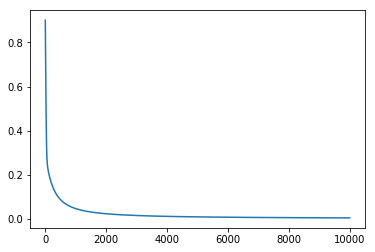

In [409]:
lst = np.array([i for i in range(10000)])
plt.plot(lst, d)

_Predictions on the basis of final weights_

In [415]:
n.a[-1]

array([[0.00926703],
       [0.9910056 ],
       [0.99107276],
       [0.00907184]])

_Defining a threshold function to get outputs in understandable terms_

In [416]:
def threshold(x):
    res = []  
    for i in x:
        if(i > 0.5):
            res.append(1)
        else:
            res.append(-1)
    return(res)

_Final results of the XOR Gate_

In [417]:
threshold(n.a[-1])

[-1, 1, 1, -1]